# Setup

📝 *Import required libraries and files:*

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
# - 4.1. Search Top Players
from typing import Iterable, List, Optional, Union, Dict
# - 4.2. Compare Players
import matplotlib.pyplot as plt

In [2]:
path = "../assets/df_final.parquet"
df_final = pd.read_parquet(path)
pd.set_option('display.max_columns', None)
print(f"Shape of df: {df_final.shape}")
df_final.head(2)

Shape of df: (8367, 166)


,PlayerID,Player,League,Squad,elegible,Position,Age,Nation,Market Value (M€),Matches,Starts,Minutes,Goals,Expected Goals,Goals Minus Expected,Goals not Penalty,Penalty Goals,Penalty Efficacy,Shoots,Shoots on Target,Goals/Shoot,AvgShoot Distance,FreeKick Tacker,Assists,Crosses,Penalty Won,Offsides,Cmp Passes,Cmp Passes%,Prog Passes,Passing Distance,Pass Prog Distance,Short Cmp,Short Cmp%,Medium Cmp,Medium Cmp%,Long Cmp,Long Cmp%,Key Passes,Goal Creating Actions,Take-Ons Succ,Take-Ons Succ%,Fouls Suffered,Carries,Carries TotDist,Prog Carries,Carries PrgDist,Carries 1/3,Touches,Errors,Aerial Duels,Aerial Duels Won%,Tackles,Tackles Won,Blocks,Interceptions,Ball Recoveries,Clearances,Own Goals,Fouls Commited,Penalty Commited,Yellow Cards,Red Cards,Goals_90m,Expected Goals_90m,Goals Minus Expected_90m,Goals not Penalty_90m,Penalty Goals_90m,Shoots_90m,Shoots on Target_90m,Assists_90m,Crosses_90m,Penalty Won_90m,Offsides_90m,Cmp Passes_90m,Prog Passes_90m,Passing Distance_90m,Pass Prog Distance_90m,Short Cmp_90m,Medium Cmp_90m,Long Cmp_90m,Key Passes_90m,Goal Creating Actions_90m,Take-Ons Succ_90m,Fouls Suffered_90m,Carries_90m,Carries TotDist_90m,Prog Carries_90m,Carries PrgDist_90m,Carries 1/3_90m,Touches_90m,Errors_90m,Aerial Duels_90m,Tackles_90m,Tackles Won_90m,Blocks_90m,Interceptions_90m,Ball Recoveries_90m,Clearances_90m,Own Goals_90m,Fouls Commited_90m,Penalty Commited_90m,Yellow Cards_90m,Red Cards_90m,Goals_90m_scaled,Expected Goals_90m_scaled,Goals Minus Expected_90m_scaled,Goals not Penalty_90m_scaled,Penalty Goals_90m_scaled,Penalty Efficacy_scaled,Shoots_90m_scaled,Shoots on Target_90m_scaled,Goals/Shoot_scaled,AvgShoot Distance_scaled,Assists_90m_scaled,Crosses_90m_scaled,Penalty Won_90m_scaled,Offsides_90m_scaled,Cmp Passes_90m_scaled,Cmp Passes%_scaled,Prog Passes_90m_scaled,Passing Distance_90m_scaled,Pass Prog Distance_90m_scaled,Short Cmp_90m_scaled,Short Cmp%_scaled,Medium Cmp_90m_scaled,Medium Cmp%_scaled,Long Cmp_90m_scaled,Long Cmp%_scaled,Key Passes_90m_scaled,Goal Creating Actions_90m_scaled,Take-Ons Succ_90m_scaled,Take-Ons Succ%_scaled,Fouls Suffered_90m_scaled,Carries_90m_scaled,Carries TotDist_90m_scaled,Prog Carries_90m_scaled,Carries PrgDist_90m_scaled,Carries 1/3_90m_scaled,Touches_90m_scaled,Errors_90m_scaled,Aerial Duels_90m_scaled,Aerial Duels Won%_scaled,Tackles_90m_scaled,Tackles Won_90m_scaled,Blocks_90m_scaled,Interceptions_90m_scaled,Ball Recoveries_90m_scaled,Clearances_90m_scaled,Own Goals_90m_scaled,Fouls Commited_90m_scaled,Penalty Commited_90m_scaled,Yellow Cards_90m_scaled,Red Cards_90m_scaled,Goal Scoring,Goal Efficacy,Shooting,Passing Influence,Passing Accuracy,Goal Creation,Possession Influence,Progression,Dribling,Aerial Influence,Defensive Influence,Discipline and Consistency
0,1,Matías Abaldo,arg1,Independiente,0,Forward,21,URU,NaN,3,3,201,0,0.2,-0.2,0,0,NaN,2,1,0.00,16.7,0,0,3,0,3,45,70.3,8,597,231,29,80.6,13,72.2,2,50.0,1,4,1,12.5,3,50,226,3,82,0,96,0,6,50.0,2,1,3,1,7,0,0,0,0,0,0,0.000,0.090,-0.090,0.000,0.0,0.896,0.448,0.000,1.343,0.0,1.343,20.149,3.582,267.313,103.433,12.985,5.821,0.896,0.448,1.791,0.448,1.343,22.388,101.194,1.343,36.716,0.000,42.985,0.000,2.687,0.896,0.448,1.343,0.448,3.134,0.000,0.0,0.000,0.0,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lucas Abascia,arg1,Cen. Córdoba–SdE,1,Centre Back (CB),30,ARG,0.8,14,11,1063,1,0.8,0.2,1,0,NaN,9,2,0.11,17.2,0,1,0,0,0,542,79.5,46,11663,4182,149,86.6,305,89.7,85,53.8,2,12,4,57.1,11,448,2377,7,1442,5,880,1,64,50.0,26,17,16,36,70,93,0,6,0,2,0,0.085,0.068,0.017,0.085,0.0,0.762,0.169,0.085,0.000,0.0,0.000,45.889,3.895,987.460,354.073,12.615,25.823,7.197,0.169,1.016,0.339,0.931,37.930,201.251,0.593,122.088,0.423,74.506,0.085,5.419,2.201,1.439,1.355,3.048,5.927,7.874,0.0,0.508,0.0,0.169,0.0,0.099,0.089,0.529,0.105,0.

# 4.1. - Search Top Players

Develop a function that acepts as input a list of features and brings 'n' players that have the highest score.

**I. Define df for top players function**

In [3]:
elegible = df_final[df_final['elegible']==1]

cols = [
    # ALWAYS
    "Player","League","Squad","Position","Age","Nation","Market Value (M€)","Matches","Minutes","Goals","Assists",
    
    # FEATURES TO SELECT -> 12 COMPOSITE
    "Goal Scoring", "Goal Efficacy","Shooting","Passing Influence","Passing Accuracy",'Goal Creation',
    'Possession Influence', 'Progression', 'Dribling', 'Aerial Influence','Defensive Influence','Discipline and Consistency',

    # FEATURES TO SHOW
    # - Goal Scoring
    "Goals_90m", "Goals not Penalty_90m",
    # - Goal Efficacy
    "Goals Minus Expected_90m","Penalty Efficacy","Goals/Shoot",
    # - Shooting
    "Shoots_90m","Shoots on Target_90m","FreeKick Tacker",
    # - Passing Influence
    "Short Cmp_90m","Medium Cmp_90m","Long Cmp_90m","Prog Passes_90m","Pass Prog Distance_90m",
    # - Passing Accuracy
    'Cmp Passes%','Short Cmp%','Medium Cmp%','Long Cmp%',
    # - Goal Creation
    'Assists_90m','Key Passes_90m','Goal Creating Actions',
    # - Possession Influence
    'Touches_90m','Carries_90m','Fouls Suffered_90m',
    # - Progressive Carries
    'Prog Carries_90m','Carries PrgDist_90m',
    # - Dribling
    'Take-Ons Succ_90m','Take-Ons Succ%',
    # - Aerial Influence
    'Aerial Duels_90m','Aerial Duels Won%',
    # - Defensive Influence
    'Tackles_90m','Tackles Won_90m','Blocks_90m','Interceptions_90m','Clearances_90m','Ball Recoveries_90m',
    # - Discipline and Consistency
    'Own Goals_90m','Errors_90m','Yellow Cards_90m','Red Cards_90m','Fouls Commited_90m','Penalty Commited_90m'   
]

df_tab1 = elegible.loc[:, cols]
df_tab1.shape

(6040, 64)

In [4]:
df_tab1.head(4)

,Player,League,Squad,Position,Age,Nation,Market Value (M€),Matches,Minutes,Goals,Assists,Goal Scoring,Goal Efficacy,Shooting,Passing Influence,Passing Accuracy,Goal Creation,Possession Influence,Progression,Dribling,Aerial Influence,Defensive Influence,Discipline and Consistency,Goals_90m,Goals not Penalty_90m,Goals Minus Expected_90m,Penalty Efficacy,Goals/Shoot,Shoots_90m,Shoots on Target_90m,FreeKick Tacker,Short Cmp_90m,Medium Cmp_90m,Long Cmp_90m,Prog Passes_90m,Pass Prog Distance_90m,Cmp Passes%,Short Cmp%,Medium Cmp%,Long Cmp%,Assists_90m,Key Passes_90m,Goal Creating Actions,Touches_90m,Carries_90m,Fouls Suffered_90m,Prog Carries_90m,Carries PrgDist_90m,Take-Ons Succ_90m,Take-Ons Succ%,Aerial Duels_90m,Aerial Duels Won%,Tackles_90m,Tackles Won_90m,Blocks_90m,Interceptions_90m,Clearances_90m,Ball Recoveries_90m,Own Goals_90m,Errors_90m,Yellow Cards_90m,Red Cards_90m,Fouls Commited_90m,Penalty Commited_90m
1,Lucas Abascia,arg1,Cen. Córdoba–SdE,Centre Back (CB),30,ARG,0.8,14,1063,1,1,0.101,0.300,0.111,0.487,0.674,0.107,0.536,0.297,0.336,0.530,0.679,0.909,0.085,0.085,0.017,NaN,0.11,0.762,0.169,0,12.615,25.823,7.197,3.895,354.073,79.5,86.6,89.7,53.8,0.085,0.169,12,74.506,37.930,0.931,0.593,122.088,0.339,57.1,5.419,50.0,2.201,1.439,1.355,3.048,7.874,5.927,0.0,0.085,0.169,0.0,0.508,0.0
4,Ignacio Abraham,arg1,Banfield,Left Back (LB),27,SYR,0.3,12,984,0,0,0.000,0.176,0.070,0.282,0.269,0.143,0.306,0.379,0.346,0.398,0.348,0.940,0.000,0.000,-0.046,NaN,0.00,0.732,0.091,0,9.238,10.793,3.293,3.293,236.341,59.5,74.8,67.4,37.1,0.000,1.006,19,52.317,21.128,1.189,2.470,80.488,0.915,41.7,2.652,44.8,1.463,1.098,1.006,0.549,4.390,2.927,0.0,0.000,0.091,0.0,1.098,0.0
5,Gonzalo Abrego,arg1,Godoy Cruz,Center Midfielder (CM),25,ARG,2.0,19,1100,0,0,0.000,0.165,0.195,0.403,0.475,0.265,0.317,0.181,0.410,0.565,0.467,0.893,0.000,0.000,-0.065,NaN,0.00,1.555,0.409,0,13.091,12.273,4.909,5.155,215.755,69.8,80.0,73.5,56.1,0.000,1.800,40,56.864,24.627,0.409,0.818,59.809,0.900,55.0,5.318,55.4,2.209,1.309,1.473,0.655,2.127,5.891,0.0,0.082,0.164,0.0,0.900,0.0
6,Jonás Acevedo,arg1,Instituto,Left Winger (LW),28,ARG,1.0,17,897,1,0,0.119,0.227,0.230,0.269,0.483,0.185,0.281,0.231,0.376,0.332,0.338,0.898,0.100,0.100,-0.040,NaN,0.06,1.605,0.502,0,12.542,9.532,1.806,4.013,137.860,70.1,88.0,76.6,34.6,0.000,0.903,34,44.649,23.679,1.104,1.505,53.679,1.104,42.3,2.107,38.1,1.605,1.304,0.803,0.602,0.702,4.515,0.0,0.000,0.301,0.0,1.204,0.0


In [5]:
df_tab1.to_parquet("../assets/df_tab1.parquet", index=False)

**II. Define `top_players` function**

In [6]:
def top_players(
    df: pd.DataFrame,
    selected_features: List[str],
    n: int = 10,
    pos: Optional[Union[str, Iterable[str]]] = None,   
    min_age: Optional[int] = None,       
    max_age: Optional[int] = None,
    min_minutes: Optional[int] = None,     
    max_minutes: Optional[int] = None,
    min_MV: Optional[float] = None,     
    max_MV: Optional[float] = None,
    score_name: str = "Score"
) -> pd.DataFrame:
    """
    Rank top players by their statistics on the selected features.
    """
    # --------------------- FUNCTION HELPERS ---------------------
    # 1) Columns that must always appear, in this exact order
    standard_cols = ["Player", "League", "Squad", "Position", "Age", "Nation","Market Value (M€)", "Matches", "Minutes","Goals","Assits"]

    # 2) For each feature in `selected_features`, which extra columns should also be included
    feature_map = {
        "Goal Scoring": ["Goals_90m", "Goals not Penalty_90m"],
        "Goal Efficacy": ["Goals Minus Expected_90m", "Goals/Shoot","Penalty Efficacy"],     
        "Shooting": ["Shoots_90m","Shoots on Target_90m","Goals/Shoot","FreeKick Tacker"],
        "Passing Influence": ["Short Cmp_90m","Medium Cmp_90m","Long Cmp_90m","Prog Passes_90m","Pass Prog Distance_90m"],
        "Passing Accuracy": ['Cmp Passes%','Short Cmp%','Medium Cmp%','Long Cmp%'],
        "Goal Creation": ['Assists_90m','Key Passes_90m','Goal Creating Actions'],     
        "Possession Influence": ['Touches_90m','Carries_90m','Fouls Suffered_90m'],
        "Progression": ['Prog Carries_90m','Carries PrgDist_90m'],
        "Dribling": ['Take-Ons Succ_90m','Take-Ons Succ%'],
        "Aerial Influence": ['Aerial Duels_90m','Aerial Duels Won%'],     
        "Defensive Influence": ['Tackles_90m','Tackles Won_90m','Blocks_90m','Interceptions_90m','Clearances_90m','Ball Recoveries_90m'],
        "Discipline and Consistency": ['Own Goals_90m','Errors_90m','Yellow Cards_90m','Red Cards_90m','Fouls Commited_90m','Penalty Commited_90m']
    }
    # --------------------------------------------------------------------
    
    df = df.copy()

    # Keep only the features that exist in df; create empty list if none match
    feat_cols = [c for c in selected_features if c in df.columns]
    if not feat_cols:
        raise ValueError("None of the `selected features` exist.")

    # ---- filters
    mask = pd.Series(True, index=df.index)

    if pos is not None:
        if isinstance(pos, str):
            mask &= df["Position"] == pos
        else:  # list of strings
            mask &= df["Position"].isin(pos)

    if min_age is not None:
        mask &= pd.to_numeric(df["Age"], errors="coerce") >= min_age
    if max_age is not None:
        mask &= pd.to_numeric(df["Age"], errors="coerce") <= max_age

    if min_minutes is not None:
        mask &= pd.to_numeric(df["Minutes"], errors="coerce") >= min_minutes
    if max_minutes is not None:
        mask &= pd.to_numeric(df["Minutes"], errors="coerce") <= max_minutes

    if min_MV is not None or max_MV is not None:
        mv = pd.to_numeric(df["Market Value (M€)"], errors="coerce")
        in_range = pd.Series(True, index=df.index)
        if min_MV is not None:
            in_range &= mv >= min_MV
        if max_MV is not None:
            in_range &= mv <= max_MV
        # include NaNs regardless of range
        mask &= (in_range | mv.isna())

    data = df.loc[mask].copy()

    # equal-weight score
    data[score_name] = data[feat_cols].mean(axis=1)

    # sort and take top-n
    data = (
        data.sort_values(by=score_name, ascending=False)
            .head(n)
            .reset_index(drop=True)
    )

    # ---------------- column selection & ordering ----------------
    # Gather all "extra" columns for the selected features (preserve order, no dups)
    extra_cols = []
    for f in selected_features:
        for col in feature_map.get(f, []):
            if col not in extra_cols:
                extra_cols.append(col)
                
    # Desired order: standard + score + selected_features + extras
    desired_order = list(standard_cols) + [score_name] + list(selected_features) + extra_cols

    # Keep only columns that actually exist (avoids KeyErrors)
    final_cols = [c for c in desired_order if c in data.columns]

    # Return only the requested columns in the requested order
    return data.loc[:, final_cols]

In [7]:
test = top_players(
    df=df_tab1,                      
    selected_features=["Goal Scoring", "Shooting"], 
    n=5,
    pos=["Center Forward (CF)", "Attacking Midfielder (AM)"],     
    max_age=24,            
    min_minutes=600,                   
    max_MV=10 
)

display(test)

,Player,League,Squad,Position,Age,Nation,Market Value (M€),Matches,Minutes,Goals,Score,Goal Scoring,Shooting,Goals_90m,Goals not Penalty_90m,Shoots_90m,Shoots on Target_90m,Goals/Shoot,FreeKick Tacker
0,Mexx Meerdink,net1,AZ Alkmaar,Center Forward (CF),22,NED,8.0,27,906,9,0.8515,1.000,0.703,0.894,0.894,3.675,1.887,0.24,0
1,Bruno Barticciotto,mex1,Santos,Center Forward (CF),24,CHI,2.8,10,669,6,0.7510,0.963,0.539,0.807,0.807,3.363,1.211,0.24,0
2,John Kennedy,mex1,Pachuca,Center Forward (CF),23,BRA,6.0,17,1120,9,0.7290,0.862,0.596,0.723,0.723,2.973,1.607,0.24,0
3,Myron Boadu,ger1,Bochum,Center Forward (CF),24,NED,7.0,19,1042,9,0.6725,0.884,0.461,0.777,0.691,2.332,1.123,0.30,0
4,Noah Ohio,net1,Utrecht,Center Forward (CF),22,NED,2.0,23,679,5,0.6545,0.725,0.584,0.663,0.530,3.049,1.591,0.17,0


# 4.2. - Compare Players

**I. Define df for top players function**

In [12]:
# Keep same columns as df_tab1
df_tab2 = df_tab1
df_tab2.to_parquet("../assets/df_tab2.parquet", index=False)
df_tab2.shape

(6040, 64)

The function `radar_dodecagon` creates a 12-axis radar (dodecagon) with the 12 composite features of each player. It accepts up to 5 players. This function is ideal to compare players from similar positions in order to understand their weaknesses and strengths.

In [9]:
def radar_dodecagon(
    df: pd.DataFrame,
    players: List[str],
    player_col: str = "Player",
    title: Optional[str] = None,
    fill: bool = False,
    max_players: int = 5,
    label_map: Optional[Dict[str, str]] = None,
    show: bool = False
) -> plt.Figure:
    """
    Draw a 12-axis radar (dodecagon) for up to `max_players` players and return the figure.
    """

    features_12 = [
        "Goal Scoring", "Goal Efficacy", "Shooting",
        "Passing Influence", "Passing Accuracy", "Goal Creation",
        "Possession Influence", "Progression", "Dribbling",
        "Defensive Pressure", "Defensive Influence", "Discipline and Consistency"
    ]
    
    if not players:
        raise ValueError("Provide at least one player name.")
    if len(players) > max_players:
        raise ValueError(f"Provide at most {max_players} players (got {len(players)}).")

    data = df.copy()
    for f in features_12:
        if f not in data.columns:
            data[f] = np.nan

    angles = np.linspace(0, 2*np.pi, len(features_12), endpoint=False)
    angles_closed = np.r_[angles, angles[0]]
    labels = [label_map.get(f, f) for f in features_12] if label_map else features_12

    fig, ax = plt.subplots(subplot_kw=dict(polar=True), figsize=(12, 12))
    ax.set_xticks(angles)
    ax.set_xticklabels(labels)
    ax.set_ylim(0, 1.0)
    ax.set_yticks([0.2, 0.4, 0.6, 0.8])
    ax.set_yticklabels(["0.2", "0.4", "0.6", "0.8"])

    plotted = 0
    for p in players:
        idx = (data[player_col].astype(str) == str(p))
        if not idx.any():
            continue

        row = (data.loc[idx, features_12]
                 .apply(pd.to_numeric, errors="coerce")
                 .fillna(0.0)
                 .iloc[0])

        vals = row.values.tolist()
        vals_closed = vals + vals[:1]

        ax.plot(angles_closed, vals_closed, linewidth=2, label=p)
        if fill:
            ax.fill(angles_closed, vals_closed, alpha=0.10)

        plotted += 1

    if plotted == 0:
        raise ValueError("None of the requested players were found in the data.")

    if title:
        ax.set_title(title, pad=28)

    ax.legend(loc="upper right", bbox_to_anchor=(1.25, 1.05))
    fig.tight_layout()

    if show:
        plt.show()         
        plt.close(fig)     
    else:
        plt.close(fig)      

    return fig

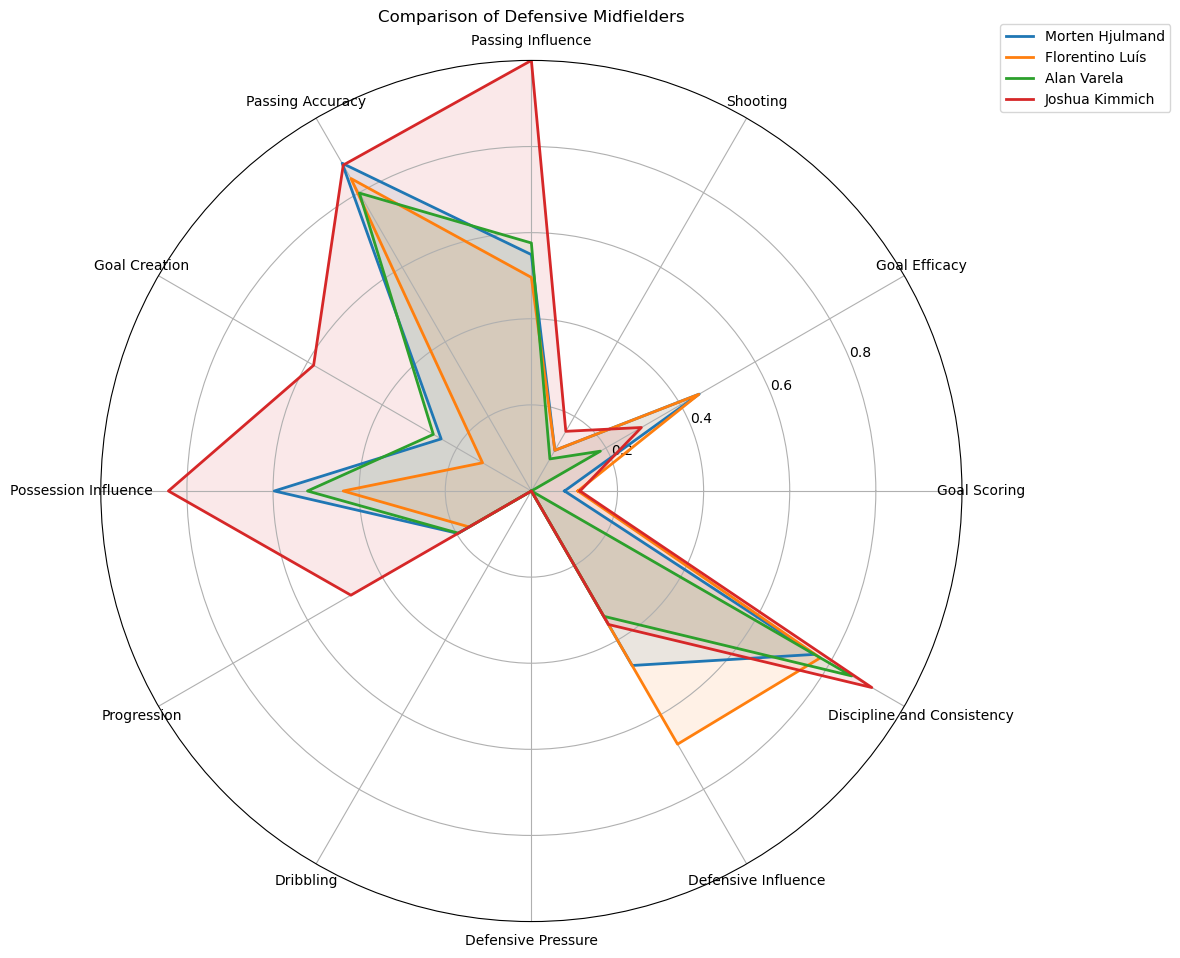

In [10]:
radar_dodecagon(
    df = df_tab2,
    players=["Morten Hjulmand", "Florentino Luís", "Alan Varela","Joshua Kimmich"],
    title="Comparison of Defensive Midfielders",
    fill=True,
    show=False
)

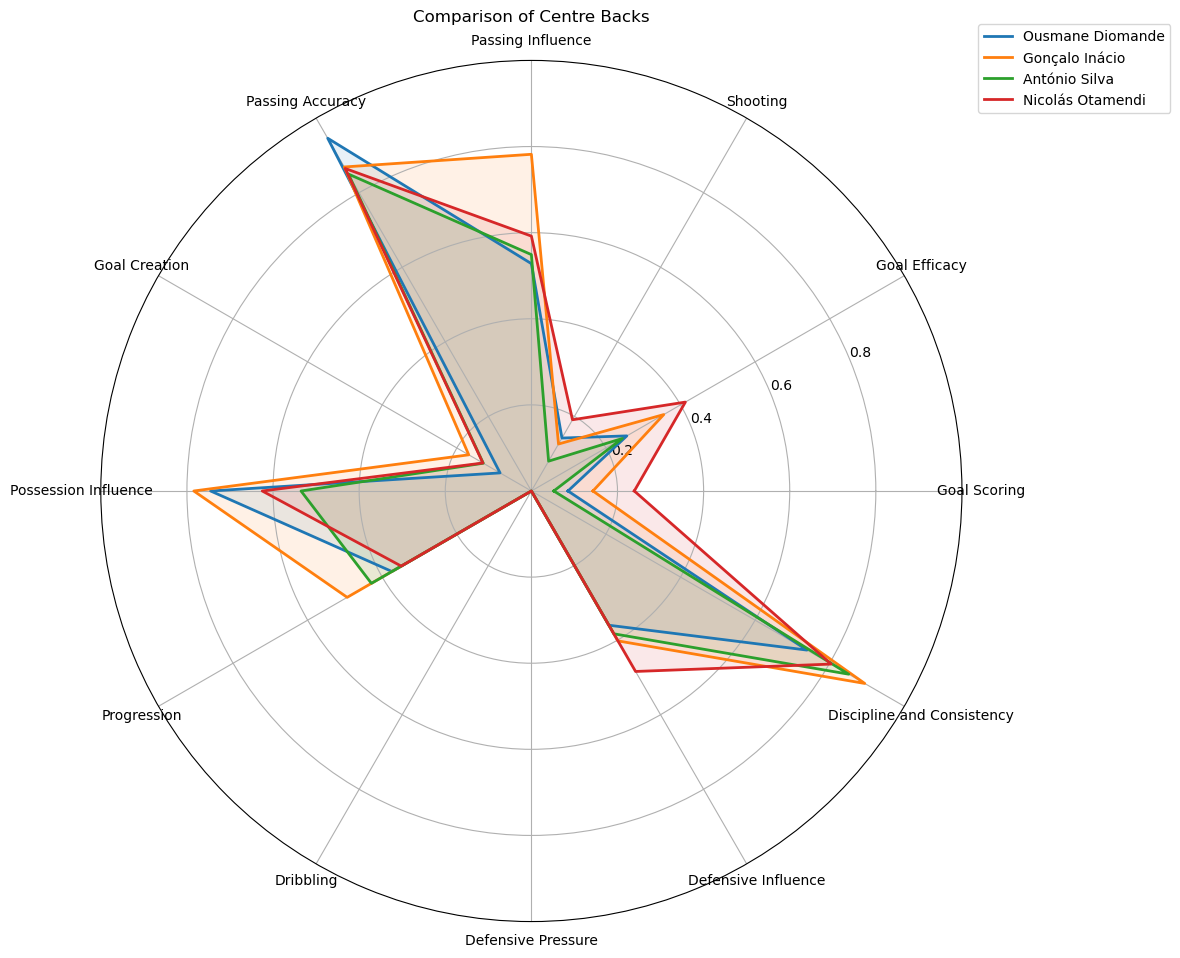

In [11]:
radar_dodecagon(
    df = df_tab2,
    players=["Ousmane Diomande", "Gonçalo Inácio", "António Silva", "Nicolás Otamendi"],
    title="Comparison of Centre Backs",
    fill=True
)